In [7]:
import time
print(time.ctime(time.time()))

Tue Dec  9 08:54:48 2025


# Advent of Code Day 9

Puzzle text available at:
https://adventofcode.com/2025/day/9

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations

In [9]:
# Day of calendar
day = 9
# Input filename
puzzle_test = 'input_day%02d_test.txt' %(day)
puzzle_input = 'input_day%02d.txt' %(day)

In [63]:
with open(puzzle_test, 'r') as f:
    red_tiles = np.loadtxt(f, delimiter=',', dtype=int)
print(red_tiles[:10])


[[ 7  1]
 [11  1]
 [11  7]
 [ 9  7]
 [ 9  5]
 [ 2  5]
 [ 2  3]
 [ 7  3]]


## Part 1

Find the closest junction boxes and connect them

In [82]:
def get_area(point1,point2):
    dx = abs(point2[0] - point1[0]) + 1
    dy = abs(point2[1] - point1[1]) + 1

    area = dx * dy
    
    return area

In [83]:
# This part is quite simple so lets just loop through all the possible rectangles and check its area
corners = list(combinations(np.arange(len(red_tiles)),2))

area_max = 0
for idx1, idx2 in corners:
    area_new = get_area(red_tiles[idx1], red_tiles[idx2])
    area_max = max(area_max,area_new)


In [84]:
print("what do you get if you multiply together the sizes of the three largest circuits?")
print(int(area_max))

what do you get if you multiply together the sizes of the three largest circuits?
50


In [26]:
tiles = np.zeros((15,15))
print(tiles)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [57]:
tiles = np.zeros((10,15), dtype=int)
for tile in red_tiles:
    tiles[tile[1],tile[0]] = 1

In [64]:
red_tiles.shape

(8, 2)

In [68]:
for idx1,idx2 in corners:
    rectangle_x = sorted((red_tiles[idx1,1],red_tiles[idx2,1]))
    rectangle_y = sorted((red_tiles[idx1,0],red_tiles[idx2,0]))

In [73]:
basic_grid = np.full(tiles.shape, fill_value=np.nan)
print(basic_grid)

[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]


In [81]:
rectangle_x[0]

3

In [85]:
basic_grid = np.full(tiles.shape, fill_value=np.nan)
x_vec = np.arange(rectangle_x[0],rectangle_x[1]+1)
y_vec = np.arange(rectangle_y[0],rectangle_y[1]+1)
print(x_vec,y_vec)
basic_grid[x_vec,y_vec] = 1
print(basic_grid)

[3] [2 3 4 5 6 7]
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan  1.  1.  1.  1.  1.  1. nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]


(0.0, 15.0, 0.0, 10.0)

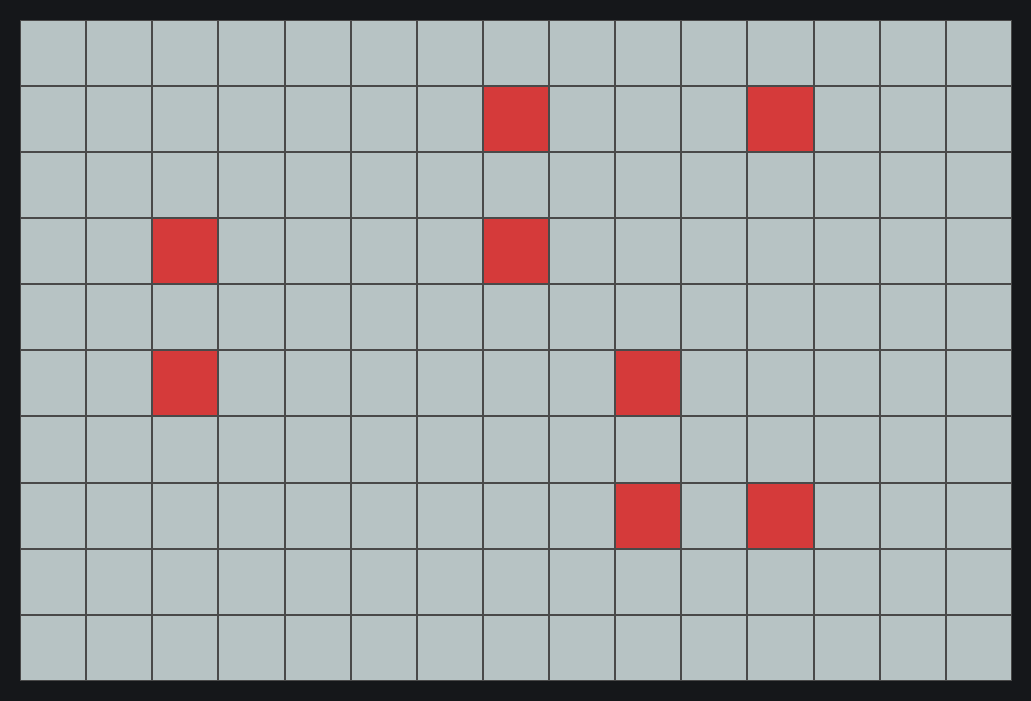

In [55]:
fig, ax = plt.subplots(dpi=200)
fig.set_facecolor('#15171A')
colors = ['#B7C3C4', '#D53A3A']
cmap = plt.matplotlib.colors.ListedColormap(colors)

frames = []

ax.clear()
ax.set_facecolor('#15171A')

mesh = ax.pcolormesh(np.flip(tiles,axis=0), cmap=cmap, 
                        linewidth=0.1, vmin=0, vmax=1, edgecolor='#494949')

ax.pcolormesh(np.flip(tiles,axis=0), cmap=cmap, 
                        linewidth=0.1, vmin=0, vmax=1, edgecolor='#494949')

ax.set_aspect('equal')
ax.axis('off')



## Part 2